# 정규성 검정
정규분포는 금융에서 가장 중요한 분포라고 할 수 있으며 금융 이론을 구성하는 중요한 통계 요소 중의 하나이다. 다음과 같은 금융 이론들은 모두 주식시장의 수익률이 정규분포를 이룬다는 사실에 기반을 두고 있다.

#### 포트폴리오 이론
주식 수익률이 정규분포를 이루면 최적 포트폴리오를 선택하는 문제는 각 주식의 평균 수익률과 수익률의 분산(변동성), 그리고 각 주식 사이의 공분산만을 고려하는 투자 결정 문제로 귀착된다.
#### 자본 자산 가격결정 모형
주식 수익률이 정규분포를 이루면 개별 주식의 가격과 전체 시장 지수의 관게는 베타라고 불리는 개별 주식과 시장 지수의 공통 움직임을 설명하는 측도로 간단히 표현할 수 있다.
#### 효율적 시장 가설
효율적 시장은 얻을 수 있는 '모든' 정보가 가격에 반영되어 있는 시장을 말한다. 여기에서 '모든'이란 말은 넓은 의미로, 정보가 모든 시장 c참여자에게 공개되어 있다는 의미일 수도 있고 좁은 의미로, 그 정보를 알고 있는 일부의 시장 참여자가 존재한다는 의미일 수도 있다. 효율적 시장 가설이 맞는다면 주식 가격은 무작위로 움직이게 되며 수익률은 정규분포를 이루게 된다.
#### 옵션 가격결정 모형
브라운 운동은 주식이나 다른 자산의 가격 움직임을 묘사하는 가장 표준적인 모형이다. 유명한 bsm 옵션 가격결정 공식은 주식의 움직임에 대해 정규분포 수익률을 발생시키는 기하 브라운 운동 모형을 사용한다.

## 벤치마크 자료 분석

In [4]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# 기하 브라운 운동 모형에 대한 몬테카를로 경로 생성 함수 정의
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M+1, I), np.float64)
    paths[0] = S0
    for t in range(1, M+1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t-1] *np.exp((r-0.5*sigma**2)*dt
                                     +sigma *np.sqrt(dt)*rand)
    return paths

In [9]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
paths = gen_paths(S0, r, sigma, T, M, I)

Text(0, 0.5, 'index level')

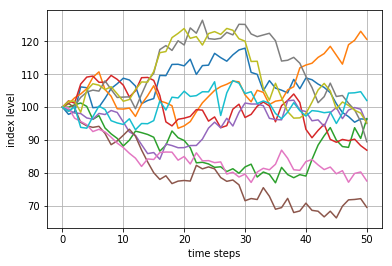

In [10]:
plt.plot(paths[:,:10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [14]:
# 로그 수익률의 분포
log_returns = np.log(paths[1:] / paths[0:-1])

In [16]:
paths[:,0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [17]:
log_returns[:,0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [18]:
# 통계치 출력
def print_statistics(array):
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30*"-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

In [19]:
print_statistics(log_returns.flatten())
# flatten 메서드는 다차원 배열의 모든 자료를 1차원으로 바꾸어준다.

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


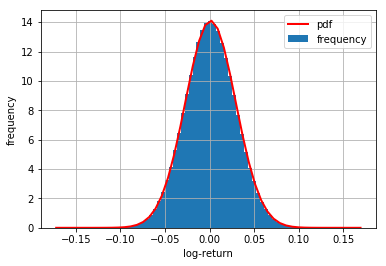

In [22]:
#로그 수익률 분포와 주어진 r,sigma 값에 대한 정규분포의 확률 밀도 함수 비교
plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma/np.sqrt(M)),
        'r', lw=2.0, label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantiles')

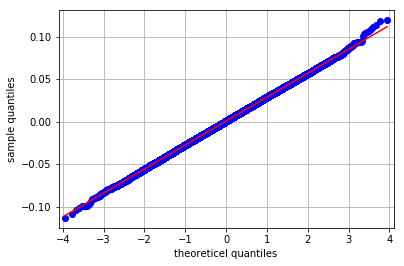

In [23]:
# Q-Q 플롯
sm.qqplot(log_returns.flatten()[::500],line = 's')
plt.grid(True)
plt.xlabel('theoreticel quantiles')
plt.ylabel('sample quantiles')

### 정규성 검정 세가지
#### 왜도 검정
이 검정은 샘플 자료의 왜도가 정규분포와 일치하는지 판단한다.
#### 첨도 검정
마찬가지로 이 검정은 샘플 자료의 첨도가 정규분포와 일치하는지 판단한다.
#### 정규성 검정
다른 두 검정 방법을 조합한다.

In [26]:
def normality_tests(arr):
    print("Skew of data set   %14.3f" % scs.skew(arr))
    print("Skew test p-value  %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set   %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value  %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value  %14.3f" % scs.normaltest(arr)[1])

In [27]:
normality_tests(log_returns.flatten())

Skew of data set            0.001
Skew test p-value           0.430
Kurt of data set            0.001
Kurt test p-value           0.541
Norm test p-value           0.607


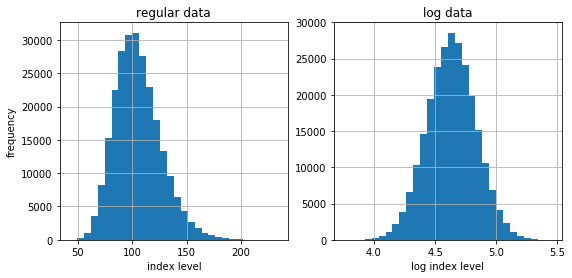

In [28]:
# 만기의 값이 로그 정규분포를 이루는지 확인
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
ax1.hist(paths[-1], bins=30)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax1.grid(True)
ax2.hist(np.log(paths[-1]), bins=30)
ax2.set_xlabel('log index level')
ax2.set_title('log data')
ax2.grid(True)

In [29]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [30]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [31]:
normality_tests(np.log(paths[-1]))

Skew of data set           -0.001
Skew test p-value           0.851
Kurt of data set           -0.003
Kurt test p-value           0.744
Norm test p-value           0.931


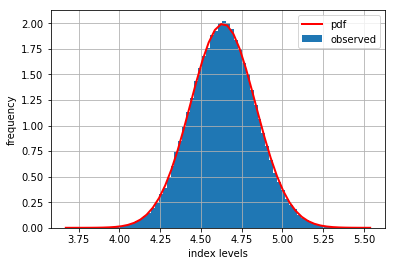

In [32]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
        'r', lw=2.0, label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantiles')

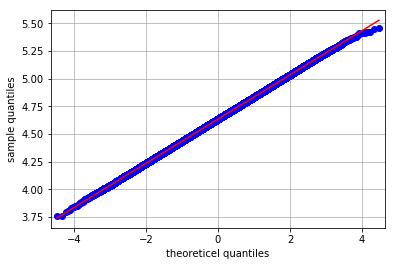

In [33]:
sm.qqplot(log_data,line = 's')
plt.grid(True)
plt.xlabel('theoreticel quantiles')
plt.ylabel('sample quantiles')

## 현실 자료 분석

In [60]:
import pandas as pd 
import pandas_datareader.data as web
import datetime as dt

In [87]:
symbols = ['^GDAXI','^GSPC','MSFT','035420.KS']
a = dt.datetime(2006, 1, 1)
b = dt.datetime(2014, 9, 26)

In [89]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, 'yahoo', a,b)['Adj Close']
data = data.dropna()
data.head()

,^GDAXI,^GSPC,MSFT,035420.KS
Date,,,,
2006-01-03,5460.680176,1268.800049,19.657124,20989.970703
2006-01-04,5523.620117,1273.459961,19.752342,21421.478516
2006-01-05,5516.529785,1273.479980,19.766989,21552.464844
2006-01-06,5536.319824,1285.449951,19.708401,21868.457031
2006-01-09,5537.109863,1290.150024,19.671768,23039.642578


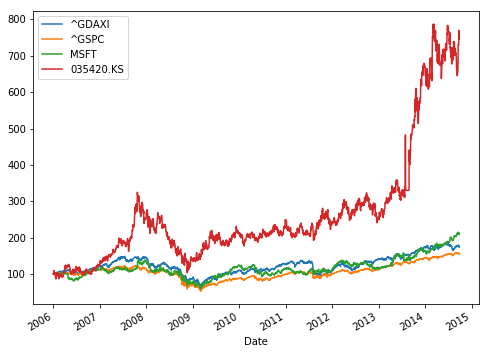

In [90]:
(data/data.iloc[0]*100).plot(figsize=(8,6))

In [92]:
# 로그 수익률
log_returns = np.log(data / data.shift(1))
log_returns.head()

,^GDAXI,^GSPC,MSFT,035420.KS
Date,,,,
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,0.011460,0.003666,0.004832,0.020349
2006-01-05,-0.001284,0.000016,0.000741,0.006096
2006-01-06,0.003581,0.009356,-0.002968,0.014555
2006-01-09,0.000143,0.003650,-0.001860,0.052171


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238564664A8>,
      dtype=object)

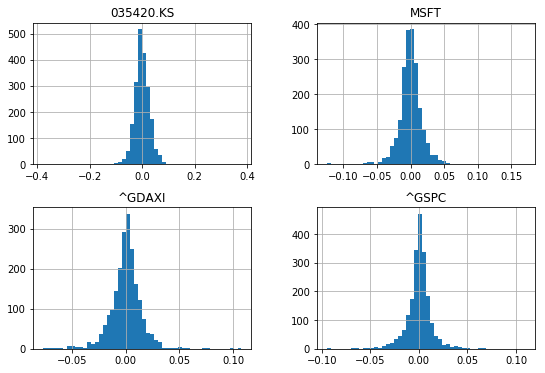

In [93]:
log_returns.hist(bins=50, figsize=(9,6))

In [94]:
# 각각의 시계열에 대한 통계치
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30*"-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol ^GDAXI
------------------------------
     statistic           value
------------------------------
          size      2081.00000
           min        -0.07739
           max         0.10797
          mean         0.00027
           std         0.01498
          skew         0.09615
      kurtosis         6.31705

Results for symbol ^GSPC
------------------------------
     statistic           value
------------------------------
          size      2081.00000
           min        -0.09470
           max         0.10957
          mean         0.00021
           std         0.01391
          skew        -0.28651
      kurtosis         9.64913

Results for symbol MSFT
------------------------------
     statistic           value
------------------------------
          size      2081.00000
           min        -0.12458
           max         0.17063
          mean         0.00036
           std         0.01834
          skew         0.04089
      kurtosis         

Text(0, 0.5, 'sample quantiles')

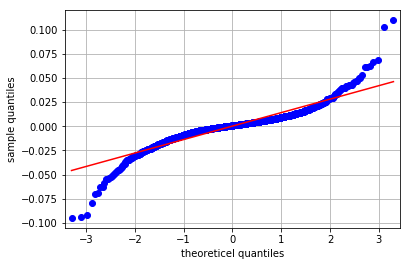

In [96]:
sm.qqplot(log_returns['^GSPC'].dropna(),line = 's')
plt.grid(True)
plt.xlabel('theoreticel quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

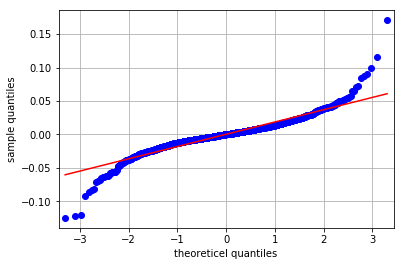

In [97]:
sm.qqplot(log_returns['MSFT'].dropna(),line = 's')
plt.grid(True)
plt.xlabel('theoreticel quantiles')
plt.ylabel('sample quantiles')

In [98]:
# 정식 정규성 검정
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(32*"-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol ^GDAXI
--------------------------------
Skew of data set            0.096
Skew test p-value           0.073
Kurt of data set            6.317
Kurt test p-value           0.000
Norm test p-value           0.000

Results for symbol ^GSPC
--------------------------------
Skew of data set           -0.287
Skew test p-value           0.000
Kurt of data set            9.649
Kurt test p-value           0.000
Norm test p-value           0.000

Results for symbol MSFT
--------------------------------
Skew of data set            0.041
Skew test p-value           0.445
Kurt of data set            9.654
Kurt test p-value           0.000
Norm test p-value           0.000

Results for symbol 035420.KS
--------------------------------
Skew of data set            0.444
Skew test p-value           0.000
Kurt of data set           24.197
Kurt test p-value           0.000
Norm test p-value           0.000


모든 경우에 대해 유의 확률이 0으로 정규분포 가정을 강력하게 기각하고 있다. 따라서 주식 시장 수익률이 기하 브라운 운동 모형과 같이 정규분포를 따른다는 가정은 일반적으로 정당화될 수 없으며 팻 테일을 설명하는 확장된 모형을 사용해야 한다.